In [1]:
import pandas as pd
import numpy as np
import pylab as plt

# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(10, 5))

# Size of matplotlib figures that contain subplots
fizsize_with_subplots = (10, 10)

# Size of matplotlib histogram bins
bin_size = 10

In [2]:
df= pd.read_csv(r'D:\Downloads\train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Text(0.5, 1.0, 'Age Histogram')

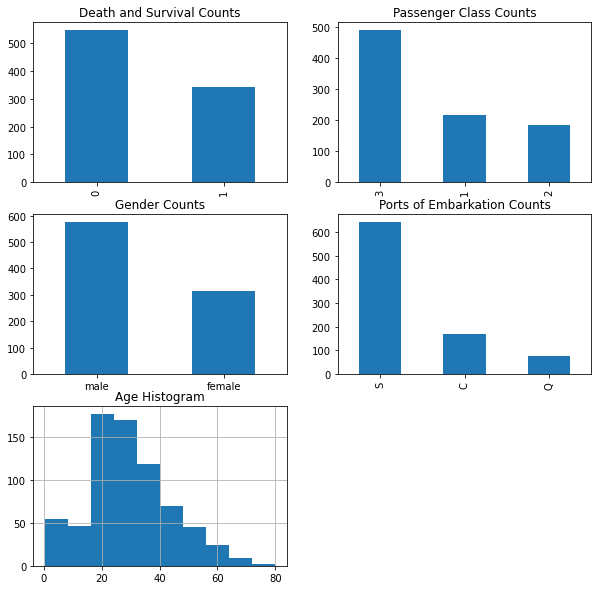

In [5]:
# Set up a grid of plots
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 2)

# Plotting death and survival counts
plt.subplot2grid(fig_dims, (0, 0))
df['Survived'].value_counts().plot(kind='bar', 
                                         title='Death and Survival Counts')

# Plotting Pclass counts
plt.subplot2grid(fig_dims, (0, 1))
df['Pclass'].value_counts().plot(kind='bar', 
                                       title='Passenger Class Counts')

# Plotting Sex counts
plt.subplot2grid(fig_dims, (1, 0))
df['Sex'].value_counts().plot(kind='bar', 
                                    title='Gender Counts')
plt.xticks(rotation=0)

# Plotting Embarked counts
plt.subplot2grid(fig_dims, (1, 1))
df['Embarked'].value_counts().plot(kind='bar', 
                                         title='Ports of Embarkation Counts')

# Plotting the Age histogram
plt.subplot2grid(fig_dims, (2, 0))
df['Age'].hist()
plt.title('Age Histogram')

In [6]:
#Determining which proportion of passengers survived based on their passenger class

pclass_xt = pd.crosstab(df['Pclass'], df['Survived'])
pclass_xt

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


Text(0, 0.5, 'Survival Rate')

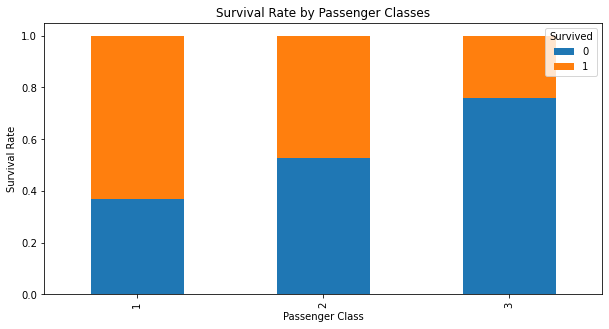

In [7]:
#Plotting the above data as graph

pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)

pclass_xt_pct.plot(kind='bar', 
                   stacked=True, 
                   title='Survival Rate by Passenger Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

In [9]:
#Female = 0 and Male = 1

sexes = sorted(df['Sex'].unique())
genders_mapping = dict(zip(sexes, range(0, len(sexes) + 1)))
genders_mapping

{'female': 0, 'male': 1}

In [10]:
df['Sex_Val'] = df['Sex'].map(genders_mapping).astype(int)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


<AxesSubplot:title={'center':'Survival Rate by Gender'}, xlabel='Sex_Val'>

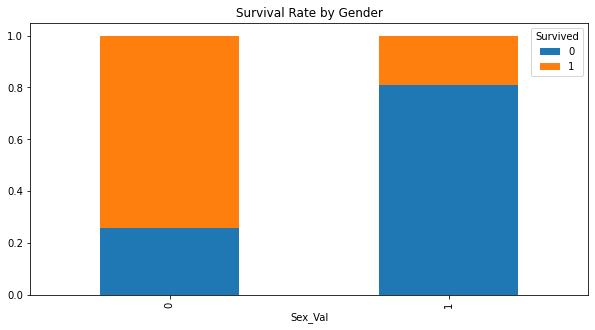

In [11]:
#Survival rate by gender

sex_val_xt = pd.crosstab(df['Sex_Val'], df['Survived'])
sex_val_xt_pct = sex_val_xt.div(sex_val_xt.sum(1).astype(float), axis=0)
sex_val_xt_pct.plot(kind='bar', stacked=True, title='Survival Rate by Gender')

In [12]:
#Majority females survived while males did not

Text(0, 0.5, 'Survival Rate')

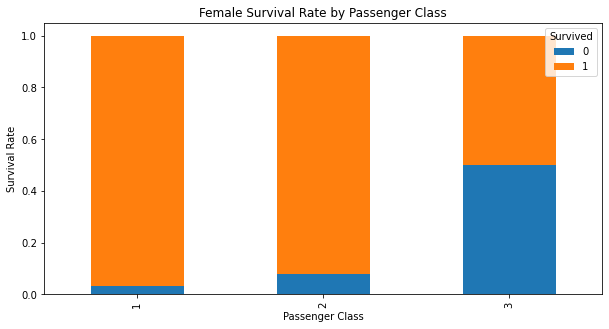

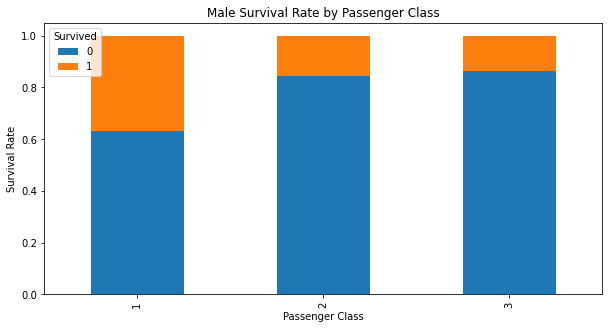

In [26]:


females_df = df[df['Sex'] == 'female']
females_xt = pd.crosstab(females_df['Pclass'], df['Survived'])
females_xt_pct = females_xt.div(females_xt.sum(1).astype(float), axis=0)
females_xt_pct.plot(kind='bar', 
                    stacked=True, 
                    title='Female Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

# Plot survival rate by Pclass
males_df = df[df['Sex'] == 'male']
males_xt = pd.crosstab(males_df['Pclass'], df['Survived'])
males_xt_pct = males_xt.div(males_xt.sum(1).astype(float), axis=0)
males_xt_pct.plot(kind='bar', 
                  stacked=True, 
                  title='Male Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

In [28]:
#The vast majority of females in First and Second class survived. Males in First class had the highest chance for survival.

In [30]:
#Making age fill to fill all the null values

df['AgeFill'] = df['Age']

# Populate AgeFill
df['AgeFill'] = df['AgeFill'] \
                        .groupby([df['Sex_Val'], df['Pclass']]) \
                        .apply(lambda x: x.fillna(x.median()))

In [32]:
#Checking for null values

len(df[df['AgeFill'].isnull()])

0

In [35]:
df[df['Age'].isnull()][['Sex', 'Pclass', 'Age']].head()

,Sex,Pclass,Age
5,male,3,NaN
17,male,2,NaN
19,female,3,NaN
26,male,3,NaN
28,female,3,NaN


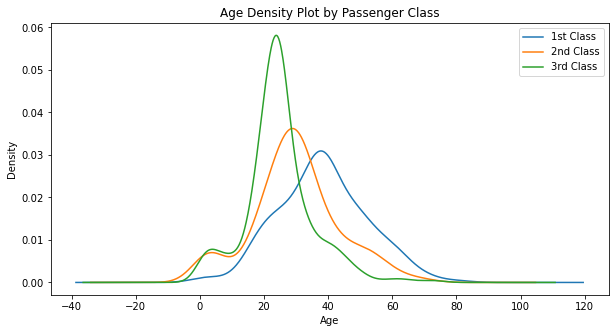

In [38]:

passenger_classes = sorted(df['Pclass'].unique())
for pclass in passenger_classes:
    df.AgeFill[df.Pclass == pclass].plot(kind='kde')
plt.title('Age Density Plot by Passenger Class')
plt.xlabel('Age')
plt.legend(('1st Class', '2nd Class', '3rd Class'), loc='best')

"""
When looking at AgeFill density by Pclass, we see the first class passengers were generally older then second class passengers,
which in turn were older than third class passengers. We've determined that first class passengers had a higher survival rate 
than second class passengers, which in turn had a higher survival rate than third class passengers.
"""

In [48]:
"""
Define a new feature FamilySize that is the sum of Parch (number of parents or children on board)
and SibSp (number of siblingsor spouses):
"""
df['FamilySize'] = df['SibSp'] + df['Parch']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val,AgeFill,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,22.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,38.0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,26.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,35.0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,35.0,0


Text(0.5, 1.0, 'Family Size Histogram')

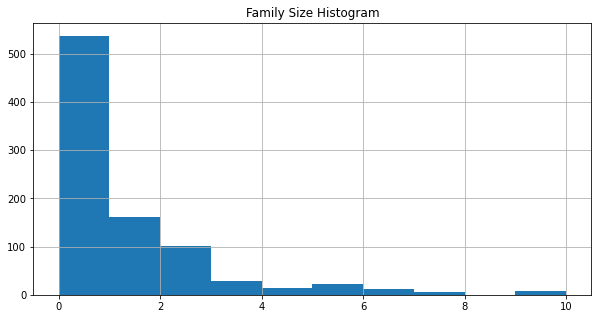

In [49]:
#Plot a histogram of FamilySize

df['FamilySize'].hist()
plt.title('Family Size Histogram')


Text(0.5, 1.0, 'Survivors by Family Size')

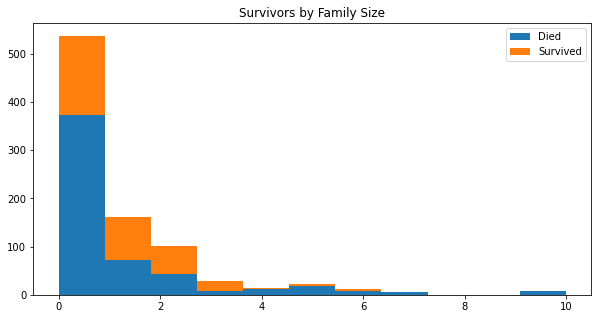

In [50]:
#Plot a histogram of AgeFill segmented by Survived

# Get the unique values of Embarked and its maximum

family_sizes = sorted(df['FamilySize'].unique())
family_size_max = max(family_sizes)

df1 = df[df['Survived'] == 0]['FamilySize']
df2 = df[df['Survived'] == 1]['FamilySize']
plt.hist([df1, df2], 
         bins=family_size_max + 1, 
         range=(0, family_size_max), 
         stacked=True)
plt.legend(('Died', 'Survived'), loc='best')
plt.title('Survivors by Family Size')

In [ ]:
#These graphs are just some of the representations done to elaborate the data and perform data analytics,
# You can use more graphs using different combinations to make more graphs and perform machine learning and AI for predicted results